## Derivata implicită

Adesea avem nevoie să calculăm derivata unei funcții, dar nu avem o expresie explicită a acestei funcții, ci doar o ecuație pe care o satisface funcția. Spre exemplu modelul Kermack-McKendrick de propagare a unei maladii infecțioase conduce la expresia

$$
\rho e^{-qA} = 1-A,
$$
unde $A$ este partea (procentul) de populație infectată, $q$ măsoară transmisibilitatea și $\rho$ este procentul de populație susceptibilă la infecție. Studiem cu se modifică $A$ atunci cînd susceptibilitatea crește. Pentru aceasta trebuie să determinăm derivata lui $A$, chiar dacă nu avem o formulă 
explicită a sa. Putem totuși deriva în ambii membri:

$$
\frac{d}{dq}\left(\rho e^{-qA}\right)=\frac{d}{dq}(1-A)
$$

și obținem

$$
-\frac{dA}{dq}=\rho e^{-qA} \left(-q\frac{dA}{dq}-A\right).
$$

Rezolvăm pentru $\frac{dA}{dq}$ și obținem 

$$
\frac{dA}{dq}=\frac{A\rho e^{-qA}}{1-pqe^{-qA}}=\frac{A\rho}{e^{qA}-pq}.
$$


# Integrala

După cum am văazut în cursul precedent, este destul de ușor să calculăm derivata unei funcții pornind de la cîteva formule și aplicînd cîteva reguli de calcul. Dar ce putem inversa procesul? Adică să de determinăm $f(x)$ dacă știm doar $f'(x)$. Procedura care ne permite să facem aceasta se numește **integrare**.

Pentru funcții simple este nu este foarte greu: de exemplu dacă $f'(x)=2x$ atunci orice funcție de forma $f(x)=x^2+c$ are derivata $2x$ pentru orice constantă $c$. De asemenea dacă $f'(x)=e^x$, atunci $f(x)=e^x+c$, pentru orice constantă $c$. În general însă, este mult mai dificil să calculăm **primitiva** decît derivata.

Se pune întrebarea dece este nevoie să calculăm primitiva unei funcții. Adesea cunoaștem derivata funcției fără să știm funcția însăși: să presupunem că avem acces la înregistrările vitezometrului unei mașini și vrem să determinăm distanța parcursă în fiecare moment $t$. Matematic aceasta înseamnă că știm $x'(t)$ (viteza). Într-o altă situație știm viteza cu care un pacient primește medicament intra-venos (via un debitmetru atașat perfuziei), dar ne interesează cantitatea administrată. Dacă putem găsi o expresie analitică pentru viteză sau debit atunci putem încerca să calculăm primitiva (deplasarea sau cantitatea de medicament în cazul al doilea). De cele mai multe ori însă avem doar un grafic de forma:

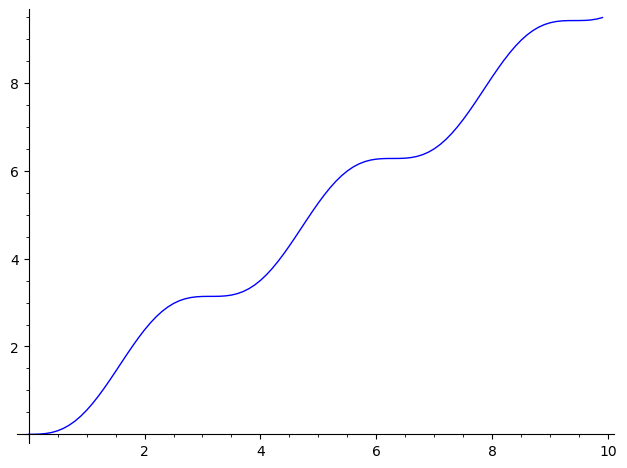

In [11]:
x=var('x')
f(x) = x-cos(x)*sin(x)
vec=[[0.1*k,f(0.1*k)] for k in range(100)]
p1=scatter_plot(vec,markersize=1)
p2=line(vec)
(p2).show()

Atunci avem nevoie să calculăm folosind metode de aproximare. Ne amintim de metoda Euler de calcul aproximativ al derivatei
$$
X'(t)\approx \frac{X(t+\Delta t)-X(t)}{\Delta t}.
$$
Atunci avem că $X(t+\Delta t) \approx X(t)+\Delta t\cdot X'(t)$. Acum repetăm construcția pentru $t=0$,$t=\Delta t$, $t=2\Delta t$, etc. Avem acum
$$
\begin{eqnarray}
X(\Delta t)=X(0) + \Delta t\cdot X'(0) \\
X(2\Delta t) = X(\Delta t)+\Delta t\cdot X'(\Delta t)=X(0)+\Delta t\cdot X'(0)+\Delta t\cdot X'(\Delta t) \\
X(3\Delta t)=X(0)+X'(0)\Delta t+X'(\Delta t)\Delta t+X'(2\Delta t)\Delta t
\end{eqnarray}
$$
Putem reface calculul pentru distanța parcursă în funcție de viteză: 
$$
X(t)\approx X(0)+V(0)\Delta t+V(\Delta t)\Delta t+V(2\Delta t)\Delta t+\dots V(n\Delta t)\Delta t
$$
cu $n$ numărul de pași pe care îi facem.  Pe scurt scriem
$$
X(t) \approx X(0)+\sum_{k=0}^n X'(k\Delta t)\cdot\Delta t.
$$
Ca să obținem egalitate trecem la limită cu $\Delta t \to 0$. Obținem 
$$
X(t) = X(0)+\lim_{\Delta t \to 0} \sum_{k=0}^n X'(k\Delta t)\cdot\Delta t=:X(0)+\int_0^t X'(t)dt.
$$
Aceast formulă se numește teorema fundamentală a analizei sau formula Leibniz-Newton. 

Exemplu: presupunem că viteza unei mașini este $V(t)=2\sqrt{1000-t^3}.$ Mașina pornește cu aproximativ $63 m/s=234 km/h$ și se oprește după $10$s. Primitiva funcției $V$ nu poate fi exprimată prin funcții elementare, deci va trebui să calculăm sume Riemann. 

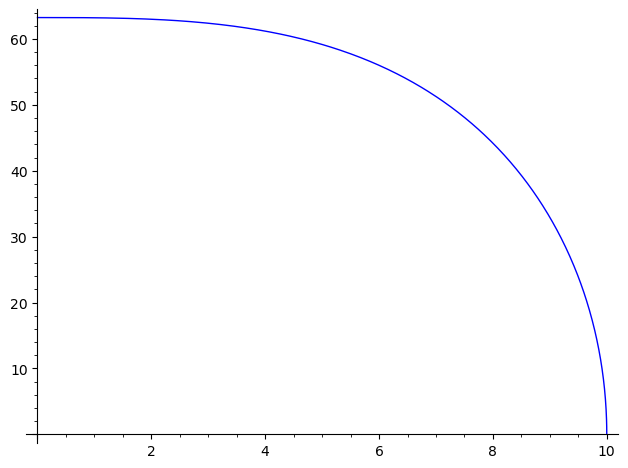

In [2]:
t=var('t')
V(t)=2*sqrt(1000-t^3)
plot(V,(0,10))

In [3]:
print(numerical_approx(V(0)))
65*3600/1000

63.2455532033676


234

Presupunem că $X(0)=0$ și $\Delta t=0.1$. Avem următoarele calcule:

In [4]:
dt=0.1
X=0
Xs=[0]
print('---------------------------------------------------\n')
print('t               |     V(t)              | X(t)          ')
print('---------------------------------------------------\n')
for k in range(0,101):
    X = X+V(k*dt)*dt
    Xs.append(X)
    print(k*dt,'|', numerical_approx(V(k*dt)),'|', numerical_approx(X))

---------------------------------------------------

t               |     V(t)              | X(t)          
---------------------------------------------------

0.000000000000000 | 63.2455532033676 | 6.32455532033676
0.100000000000000 | 63.2455215805831 | 12.6491074783951
0.200000000000000 | 63.2453002206488 | 18.9736375004599
0.300000000000000 | 63.2446993826360 | 25.2981074387236
0.400000000000000 | 63.2435293132823 | 31.6224603700518
0.500000000000000 | 63.2416002327582 | 37.9466203933276
0.600000000000000 | 63.2387223147337 | 44.2704926248010
0.700000000000000 | 63.2347056607367 | 50.5939631908746
0.800000000000000 | 63.2293602687865 | 56.9168992177533
0.900000000000000 | 63.2224959962828 | 63.2391488173816
1.00000000000000 | 63.2139225171164 | 69.5605410690932
1.10000000000000 | 63.2034492729629 | 75.8808859963895
1.20000000000000 | 63.1908854187058 | 82.1999745382601
1.30000000000000 | 63.1760397619224 | 88.5175785144523
1.40000000000000 | 63.1587206963536 | 94.8334505840877
1.

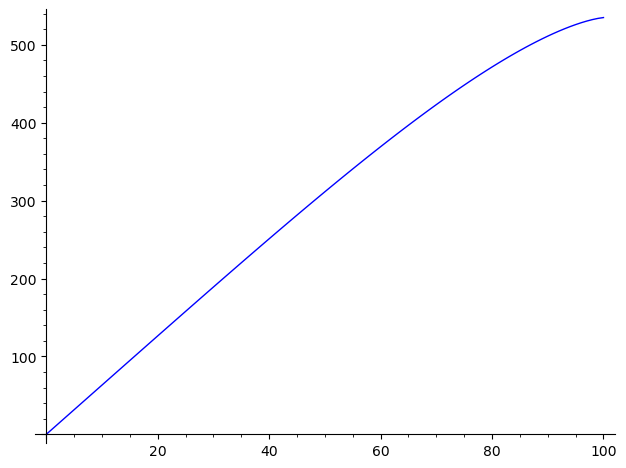

In [5]:
ts=list(range(0,101))
vec=list(zip(ts,Xs))
line(vec)

Ce am făcut de fapt pentru a calcula deplasarea:
 - am descompus intervalul $(0,t)$ în segmente de lungime egală $\Delta t$;
 - am presupus că $V(t)$ este constantă pe fiecare sub integral;
 - am calculat distanța parcursă pe fiecare interval cu formula distanța=viteza $ \times$ timpul;
 - am adunat lungimile obținute.

O observație simplă este că produsul $V(t)\cdot\Delta t$ este aria dreptunghiului cu laturile respective. Deci suma Riemann aproximează aria aflată sub graficul funcției $V'$, iar integrala este egală exact cu aria de sub grafic.

Dacă vrem să calculăm aria unei porțiuni de sub grafic între două valori ale lui $t$, să spunem $a < b$. Atunci aria este
$$
\int_a^b V(t)dt=\int_0^b V(t)dt-\int_0^a V(t)dt.
$$

Dacă $F(t)$ este primitiva lui $f(t)$, atunci
$$
\int_a^b f(t)dt=F(b)-F(a).
$$

## Ecuații diferențiale

În cîteva cazuri fericite putem folosi primitiva pentru a găsi soluții explicite pentru ecuații diferențiale. În general ecuațiile sînt de forma $x'=f(x)$ sau echivalent  $\frac{df}{dx}(t)=f(x(t))$. Cele mai simple cazuri sînt ecuațiile
$x'=kx$ și $x'=-kx$. 

Presupunem că o populație $X$ are o rată de nașteri $b$, o rată de deces $d$, o rată de imigrare $i$ și o rată de emigrare $e$, toate presupuse constante. Atunci variația populației este 
$$
X'=rX,
$$
unde $r=b+i-d-e$, pe care îl presupunem pozitivă. Care este comportarea lui $X$? Putem aplica metoda lui Euler, dar în cazul nostru, noi am văzut că
$$
\frac{de^{kt}}{dt}=ke^{kt}.
$$
Deci funcția $X(t)=e^{kt}$ este soluția ecuației. Creșterea dată de această regulă se numește **exponențială**. Soluția generală a ecuației este $$X(t)=X(0)e^{rt}.$$

Să presupunem acum că $r<0$, spre exemplu dacă populația este în scădere. Atunci ecuația noastră va fi $X'=-kX$ cu soluția
$X(t)=X(0)\cdot e^{-kt}.$

Ecuațiile de acest tip modelează fenomene în care o fracție constantă $k$ este extrasă în fiecare moment. Spre exemplu o substanță care se descompune sau
o populație care scade cu o fracție constantă etc. Graficul soluției este

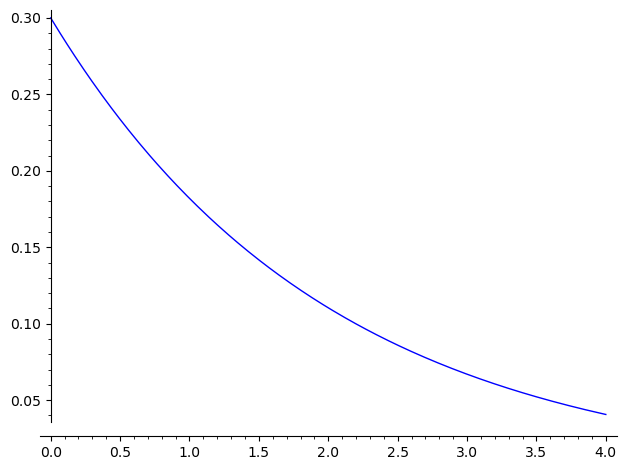

In [7]:
t=var('t')
f(t) = 0.3*exp(-0.5*t)
plot(f,(0,4))

Curba aceasta se numește scădere exponențială. 